## Q1. Data Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/bmi1_data.csv", sep=";")

print(df.columns)
df.head()

df.shape



Index(['height', 'weight', 'gender', 'urbanity', 'fastfood'], dtype='object')


(145, 5)

In [31]:
def print_missing(df):
    missing_count = df.isna().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_df = pd.DataFrame({
        "missing Count": missing_count,
        "missing %": missing_percent
    })
    # filter only columns with missing values
    missing_df = missing_df[missing_df['missing Count'] > 0]
    if missing_df.empty:
        print("No missing values found!")
    else:
        print(missing_df.sort_values(by='missing %', ascending=False))


print_missing(df)

No missing values found!


# Calculate the BMI

In [2]:
df["BMI"] = df["height"] / (df["height"] / 100) **2
df

,height,weight,gender,urbanity,fastfood,BMI
0,180,80,1,5,24.0,55.555556
1,185,98,1,1,6.0,54.054054
2,180,80,1,5,6.0,55.555556
3,168,60,0,4,24.0,59.523810
4,173,83,1,5,24.0,57.803468
...,...,...,...,...,...,...
140,162,69,0,2,6.0,61.728395
141,174,73,1,5,182.5,57.471264
142,170,70,0,4,6.0,58.823529
143,178,56,0,5,1.0,56.179775


## 3. Empirical Distribution of BMI

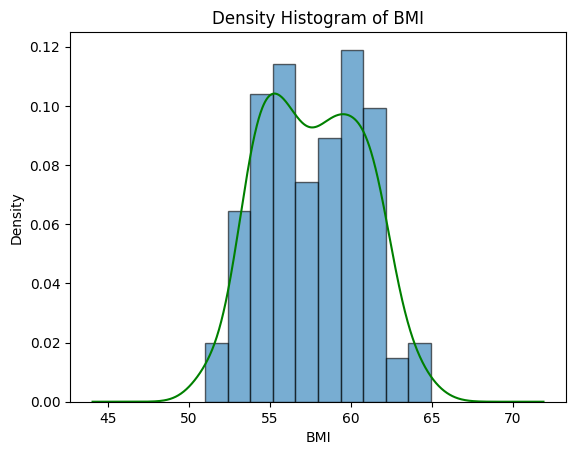

count    145.000000
mean      57.667447
std        3.088610
min       51.020408
25%       54.945055
50%       57.803468
75%       60.240964
max       64.935065
Name: BMI, dtype: float64

In [4]:
# Plot density histogram
plt.hist(df["BMI"], bins=10, density=True, alpha=0.6, edgecolor="black")
df["BMI"].plot(kind="kde", color="green")  # Add density curve
plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("Density Histogram of BMI")
plt.show()

df["BMI"].describe()

Women:
      height  weight  gender  urbanity  fastfood        BMI
0       180      80       1         5      24.0  55.555556
1       185      98       1         1       6.0  54.054054
2       180      80       1         5       6.0  55.555556
4       173      83       1         5      24.0  57.803468
8       181      90       1         5       6.0  55.248619
..      ...     ...     ...       ...       ...        ...
135     180      95       1         2       1.0  55.555556
137     183      87       1         5      24.0  54.644809
138     182      84       1         5      24.0  54.945055
139     187      86       1         5      24.0  53.475936
141     174      73       1         5     182.5  57.471264

[73 rows x 6 columns]

Men:
      height  weight  gender  urbanity  fastfood        BMI
3       168      60       0         4      24.0  59.523810
5       161      78       0         3       6.0  62.111801
6       168      82       0         2       6.0  59.523810
7       166      5

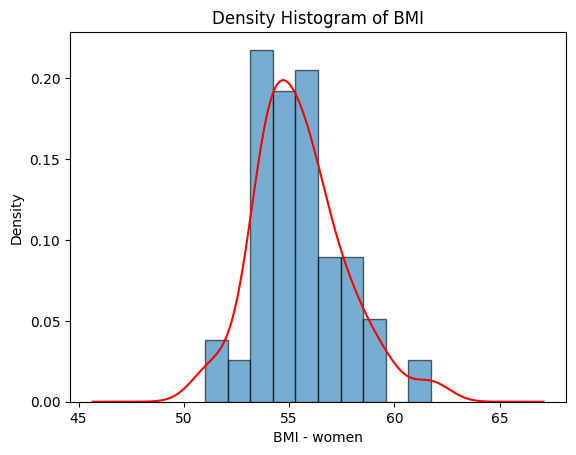

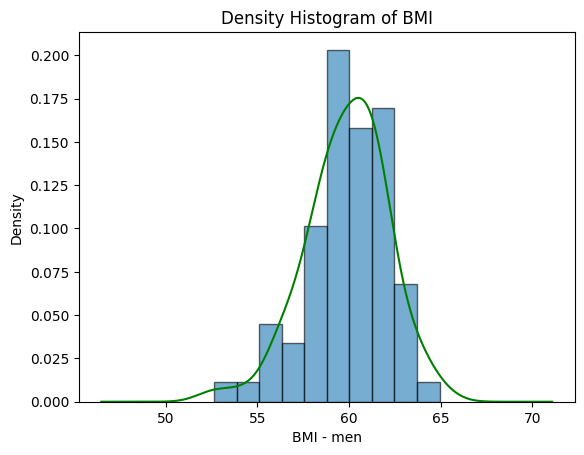

In [6]:
# Subset for women
women = df[df['gender'] == 1]

# Subset for men
men = df[df['gender'] == 0]

# Check the subsets
print("Women:\n", women)
print("\nMen:\n", men)

# Plot density histogram
plt.hist(women["BMI"], bins=10, density=True, alpha=0.6, edgecolor="black")
women["BMI"].plot(kind="kde", color="red")  # Add density curve
plt.xlabel("BMI - women")
plt.ylabel("Density")
plt.title("Density Histogram of BMI")
plt.show()


# Plot density histogram
plt.hist(men["BMI"], bins=10, density=True, alpha=0.6, edgecolor="black")
men["BMI"].plot(kind="kde", color="green")  # Add density curve
plt.xlabel("BMI - men")
plt.ylabel("Density")
plt.title("Density Histogram of BMI")
plt.show()

## 5. Boxplot by Gender

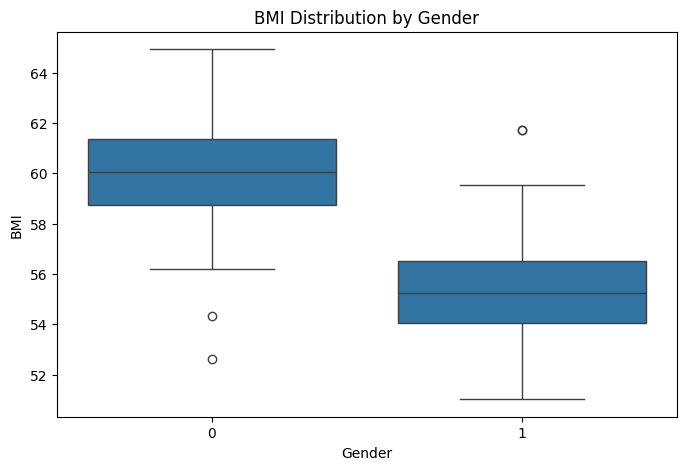

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='BMI', data=df)
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

## 6. Summary Statistics


In [8]:

desc_men = men['BMI'].describe()
desc_women = women['BMI'].describe()
desc_total = df['BMI'].describe()
# Merge into a single table
summary_table = pd.DataFrame({
    'Men': desc_men,
    'Women': desc_women,
    'Total': desc_total
})

print(summary_table)

             Men      Women       Total
count  72.000000  73.000000  145.000000
mean   59.869452  55.495605   57.667447
std     2.228108   2.133605    3.088610
min    52.631579  51.020408   51.020408
25%    58.737530  54.054054   54.945055
50%    60.060602  55.248619   57.803468
75%    61.349693  56.497175   60.240964
max    64.935065  61.728395   64.935065


## 2. Outlier Detection and Handling

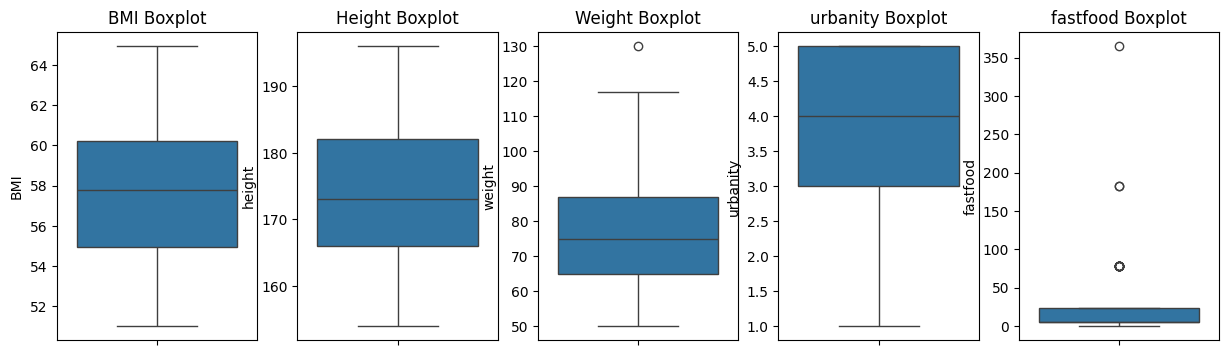

In [9]:
plt.figure(figsize=(15,4))

plt.subplot(1,5,1)
sns.boxplot(y=df['BMI'])
plt.title('BMI Boxplot')

plt.subplot(1,5,2)
sns.boxplot(y=df['height'])
plt.title('Height Boxplot')

plt.subplot(1,5,3)
sns.boxplot(y=df['weight'])
plt.title('Weight Boxplot')

plt.subplot(1,5,4)
sns.boxplot(y=df['urbanity'])
plt.title('urbanity Boxplot')

plt.subplot(1,5,5)
sns.boxplot(y=df['fastfood'])
plt.title('fastfood Boxplot')
plt.show()


In [11]:

def iqr_outliers(bmi):
    # Calculate Q1, Q3, and IQR
    Q1 = bmi.quantile(0.25)
    Q3 = bmi.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = bmi[(bmi < lower_bound) | (bmi > upper_bound)]
    print("IQR outliers:\n", outliers_iqr)

iqr_outliers(df["fastfood"])
iqr_outliers(df["weight"])
iqr_outliers(df["urbanity"])
iqr_outliers(df["BMI"])



IQR outliers:
 26      78.2
38      78.2
48     365.0
50      78.2
63      78.2
73      78.2
101     78.2
103     78.2
105     78.2
120     78.2
124    182.5
127     78.2
131     78.2
132     78.2
141    182.5
Name: fastfood, dtype: float64
IQR outliers:
 73    130
Name: weight, dtype: int64
IQR outliers:
 Series([], Name: urbanity, dtype: int64)
IQR outliers:
 Series([], Name: BMI, dtype: float64)


In [12]:
# Calculate Q1, Q3, IQR
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)]




## 3. Bivariate Exploratory Data Analysis (EDA)


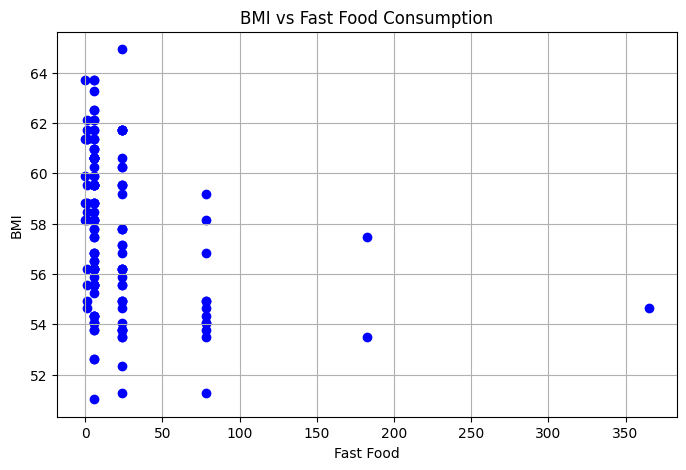

Correlation coefficient between BMI and Fast Food: -0.2642181757216635


In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df['fastfood'], df['BMI'], color='blue')
plt.title('BMI vs Fast Food Consumption')
plt.xlabel('Fast Food')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


# Calculate correlation coefficient
correlation = df['BMI'].corr(df['fastfood'])
print("Correlation coefficient between BMI and Fast Food:", correlation)

## BMI by Gender

C:\Users\profe\AppData\Local\Temp\ipykernel_35968\1062710542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='BMI', data=df, inner='quartile', palette='pastel')


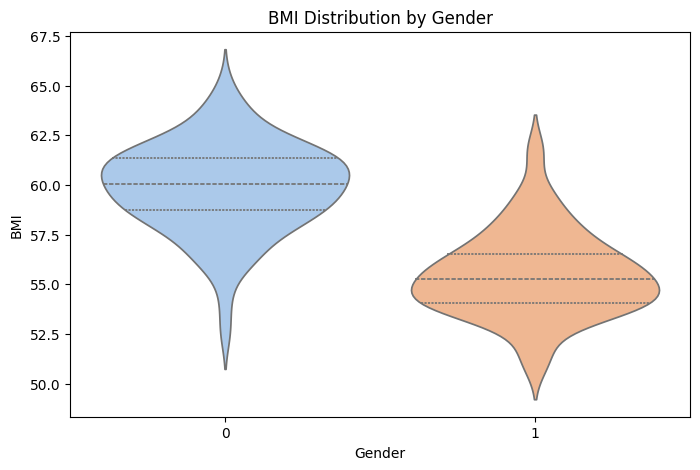

In [14]:
plt.figure(figsize=(8,5))
sns.violinplot(x='gender', y='BMI', data=df, inner='quartile', palette='pastel')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

## BMI by Urbanity

C:\Users\profe\AppData\Local\Temp\ipykernel_35968\3204051366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='urbanity', y='BMI', data=df, palette='Set2')


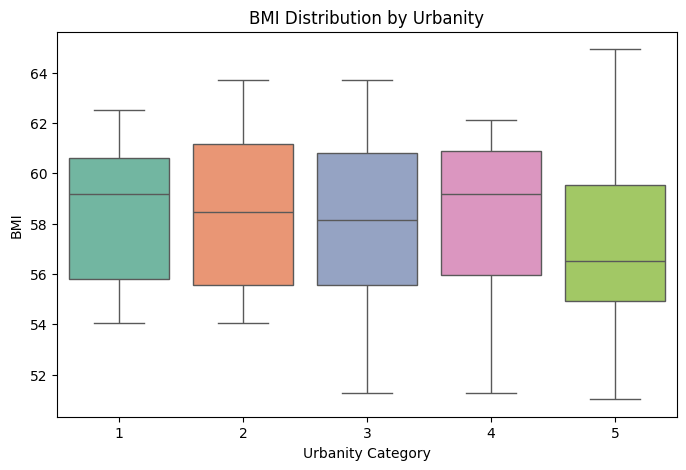

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='urbanity', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by Urbanity')
plt.xlabel('Urbanity Category')
plt.ylabel('BMI')
plt.show()

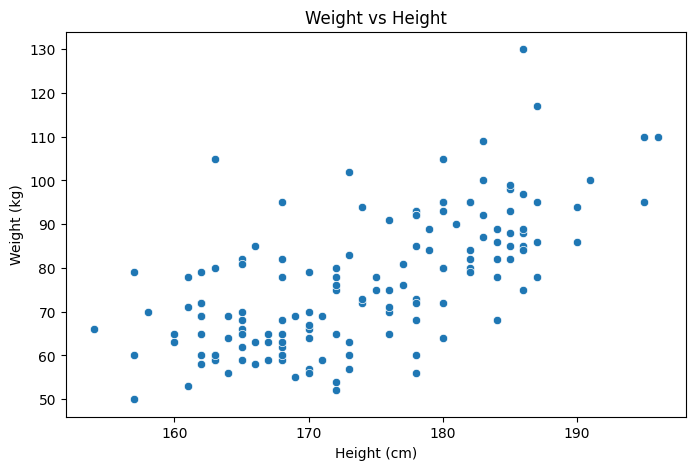

In [16]:

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='height', y='weight', data=df)
plt.title('Weight vs Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()